In [1]:
#Initial Imports
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [2]:
#Loading the California Housing Dataset

data = fetch_california_housing(as_frame=True)
df = data.frame

#data check
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
#Changing columnn names so its readable
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

# Rename target for clarity
df = df.rename(columns={"MedHouseVal": "median_house_value"})
df.head()


Shape: (20640, 9)
Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,median_house_value
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
#train/test split
X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (16512, 8)
Test shape: (4128, 8)


In [5]:
#Pipeline 1: Linear Regression
linear_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

linear_pipeline.fit(X_train, y_train)

y_pred_lr = linear_pipeline.predict(X_test)

lr_r2 = r2_score(y_test, y_pred_lr)
lr_mae = mean_absolute_error(y_test, y_pred_lr)

print("Linear Regression R²:", round(lr_r2, 4))
print("Linear Regression MAE:", round(lr_mae, 4))


Linear Regression R²: 0.5758
Linear Regression MAE: 0.5332


In [6]:
#2) Random Forest Model
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Random Forest does not need scaling
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rf_r2 = r2_score(y_test, y_pred_rf)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest R²:", round(rf_r2, 4))
print("Random Forest MAE:", round(rf_mae, 4))


Random Forest R²: 0.804
Random Forest MAE: 0.3282


In [7]:
#Comparing both models
print("Model Comparison")
print(f"Linear Regression: R²={lr_r2:.4f}, MAE={lr_mae:.4f}")
print(f"Random Forest:     R²={rf_r2:.4f}, MAE={rf_mae:.4f}")


Model Comparison
Linear Regression: R²=0.5758, MAE=0.5332
Random Forest:     R²=0.8040, MAE=0.3282


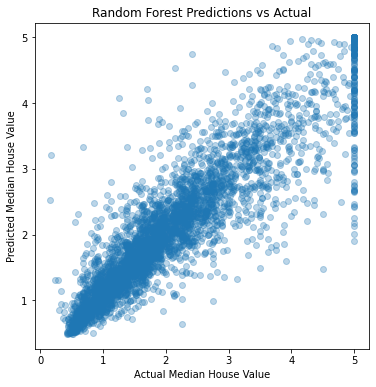

In [8]:
#Plot of random forest prediction versus actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Random Forest Predictions vs Actual")
plt.show()


In [9]:
#This is a sample to see some forest predictions for review
sample_df = pd.DataFrame({
    "Actual (100k)": y_test.values[:5],
    "Predicted (100k)": y_pred_rf[:5]
})

sample_df

,Actual (100k),Predicted (100k)
0,0.47700,0.511680
1,0.45800,0.749800
2,5.00001,4.953607
3,2.18600,2.510930
4,2.78000,2.285050
